## Computational Complexities of Three different Matrix Multiplication Algorithms

Matrix multiplication plays a central role in many scientific disciplines. Recall how many matrix multiplications have to be executed each time we travel forward or backward a deep neural network. For that reason, there have been great interests in discovering efficient methods to perform matrix multiplication. In this notebook, let's compare three of them:
- naive matrix multiplication algorithm
- Straßen matrix multiplication algorithm
- numpy built-in matrix multiplication algorithm
Although in reality we would only use the last one

In [9]:
import numpy as npt

### 1. Naive matrix multiplication with 3 for loops
This is the method we often learn in our first linear algebra lesson to multiply two matrices. To obtain entry <i,j> of X times Y. Perform an element-wise product of the i-th column of X with the j-th column of Y, then sum them up. 

In [10]:
def naive_multiplication(X,Y): 
    """
    Input: matrices X and Y
    Output matrix product of X and Y
    """
    assert X.shape[1] == Y.shape[0], "The matrices to be multiplied must have compatible sizes!"
    product = np.zeros((X.shape[0],Y.shape[1]))
    for i in range(X.shape[0]):
        # iterate through rows of X
        for j in range(Y.shape[1]):
        # iterate through columns of Y
           for k in range(Y.shape[0]):
                product[i][j] += X[i][k] * Y[k][j]
    return product

### 2. Straßen matrix multiplication
This algorithm is based on the classic divide-and-conquer apporach and has a big-O computational complexity of `O(n^2.81)` compared to `O(n^3)` for the naive matrix multiplication implemented above. This result comes directly from the Master's theorem. <br>
<br>
To sump up, matrix C, which is the product matrix of A and B, is divided into four corner matrices. Each corrner matrix is calculated indirectly from corner matrices of A and B, then we concatenate the four corner matrices into C. <br>
<br>
To keep it simple, let's limit our input to two square matrices of the same size `n` and for the full-state Strassen version: `n` is a power of 2 (since we keep diving the matrix into smaller matrices of half the size). In reality there are more complicated versions of this algorithm that works for matrices of any sizes, but the complexity won't change. Since we are only interested in the algorithm complexity, those above assumptions are reasonable.

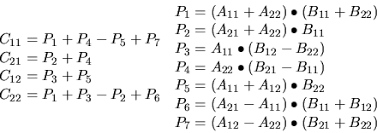

In [65]:
#One-stage Strassen
def divide_matrix_into_four(M):
    """
    Input: Square matrix M
    Output: M11, M12, M21, M22: four corner marices of M
    """
    assert M.shape[0] == M.shape[1]
    i = M.shape[0]//2
    M11 = M[:i,:i]
    M12 = M[:i,i:]
    M21 = M[i:,:i]
    M22 = M[i:,i:]
    return M11, M12, M21, M22

def merge_matrices_into_one(M11, M12, M21, M22):
    """
    Input: M11, M12, M21, M22: four corner marices of M
    Output: Square matrix M  
    """
    M1 = np.concatenate((M11,M12), axis=1)
    M2 = np.concatenate((M21,M22), axis=1)
    M = np.concatenate((M1,M2), axis=0)
    return M
    
def one_stage_strassen(A,B): 
    """
    Input: Matrix A and B to be multiplied via one_stage_Strassen
    Output: Matrix product C
    """
    A11, A12, A21, A22 = divide_matrix_into_four(A)
    B11, B12, B21, B22 = divide_matrix_into_four(B)
    P1 = naive_multiplication((A11 + A22), (B11 + B22))
    P2 = naive_multiplication((A21 + A22), B11)
    P3 = naive_multiplication(A11, (B12 - B22))
    P4 = naive_multiplication(A22, (B21 - B11))
    P5 = naive_multiplication((A11 + A12), B22)
    P6 = naive_multiplication((A21 - A11), (B11 + B12))
    P7 = naive_multiplication((A12 - A22), (B21 + B22))
    C11 = P1 + P4 - P5 + P7
    C12 = P3 + P5
    C21 = P2 + P4
    C22 = P1 + P3 - P2 + P6   
    C = merge_matrices_into_one(C11, C12, C21, C22)
    return C

In [85]:
#Full-stage Strassen
def recursive_strassen(A,B):
    """
    Input: Matrix A and B to be multiplied via full_stage_strassen (recrusive_strassen)
    Output: Matrix product C
    """
    if A.shape[0]//2 == 1:
        C = np.zeros((2,2))
        C[0,0] = A[0,0]*B[0,0] + A[0,1]*B[1,0]
        C[0,1] = A[0,0]*B[0,1] + A[0,1]*B[1,1]
        C[1,0] = A[1,0]*B[0,0] + A[1,1]*B[1,0]
        C[1,1] = A[1,0]*B[0,1] + A[1,1]*B[1,1]
        return C
    else:
        A11, A12, A21, A22 = divide_matrix_into_four(A)
        B11, B12, B21, B22 = divide_matrix_into_four(B)
        P1 = recrusive_strassen((A11 + A22), (B11 + B22))
        P2 = recrusive_strassen((A21 + A22), B11)
        P3 = recrusive_strassen(A11, (B12 - B22))
        P4 = recrusive_strassen(A22, (B21 - B11))
        P5 = recrusive_strassen((A11 + A12), B22)
        P6 = recrusive_strassen((A21 - A11), (B11 + B12))
        P7 = recrusive_strassen((A12 - A22), (B21 + B22))
        C11 = P1 + P4 - P5 + P7
        C12 = P3 + P5
        C21 = P2 + P4
        C22 = P1 + P3 - P2 + P6  
        C = merge_matrices_into_one(C11, C12, C21, C22)
        return C

### 3. Numpy built-in matrix multiplication
This is fast because vectorized operations in Numpy are executed by highly optimized C code --> much faster than their standard Python counterparts

In [87]:
#Let's check the accuracy of our implementation. Results across different methods should be similar
np.random.seed(12)
n = 4
matrix_one = np.random.rand(n,n)
matrix_two = np.random.rand(n,n)
matrix_one @ matrix_two

array([[0.88708098, 0.65832922, 0.7175791 , 0.50057046],
       [0.99929132, 0.65548279, 0.58334578, 0.85525068],
       [0.89664827, 1.10224952, 1.31321353, 0.59993759],
       [1.32485598, 0.85969212, 1.20787978, 0.42348458]])

In [88]:
naive_multiplication(matrix_one,matrix_two)

array([[0.88708098, 0.65832922, 0.7175791 , 0.50057046],
       [0.99929132, 0.65548279, 0.58334578, 0.85525068],
       [0.89664827, 1.10224952, 1.31321353, 0.59993759],
       [1.32485598, 0.85969212, 1.20787978, 0.42348458]])

In [89]:
one_stage_strassen(matrix_one,matrix_two)

array([[0.88708098, 0.65832922, 0.7175791 , 0.50057046],
       [0.99929132, 0.65548279, 0.58334578, 0.85525068],
       [0.89664827, 1.10224952, 1.31321353, 0.59993759],
       [1.32485598, 0.85969212, 1.20787978, 0.42348458]])

In [86]:
recursive_strassen(matrix_one,matrix_two)

array([[0.88708098, 0.65832922, 0.7175791 , 0.50057046],
       [0.99929132, 0.65548279, 0.58334578, 0.85525068],
       [0.89664827, 1.10224952, 1.31321353, 0.59993759],
       [1.32485598, 0.85969212, 1.20787978, 0.42348458]])

### Let's compare the above methods in terms of computational time
Our expectation is of course NumPy built-in <<< recursive_strassen < one_stage_strassen < naive_multiplication

In [92]:
n = 64
matrix_one = np.random.rand(n, n)
matrix_two = np.random.rand(n, n)

print('NumPy built-in method')
%timeit np.matmul(matrix_one,matrix_two)
print('***********************')
print('Fully recursive Strassen method')
%timeit recursive_strassen(matrix_one,matrix_two)
print('***********************')
print('One stage Strassen method')
%timeit one_stage_strassen(matrix_one,matrix_two)
print('***********************')
print('Native multiplication method')
%timeit naive_multiplication(matrix_one,matrix_two)

NumPy built-in method
14.5 µs ± 1.83 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
***********************
Fully recursive Strassen method
276 ms ± 57.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
***********************
One stage Strassen method
327 ms ± 6.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
***********************
Native multiplication method
351 ms ± 14.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
